# DOTA 2 - Step 2 Data Wrangling

This step focuses on:
* i. Data collection,
* ii. Data Organization,
* iii. Data Definition, and
* iv. Data Cleaning.

We will not consider significant actions until we proceed with **Step 3 - Exploratory Data Analysis (EDA)**

Through this work, we will analyze the data available, in order to:

* Assess if we have the necessary information to solve the problem
    * Identify the target value
    * Identify potentially useful features
* Identify potential issues with data

In [1]:
#Import the necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#  Data Collection

There is a total of 18 csv files available.

We are interested in finding the csv files that include information about the **match output** as well as some **characteristics of the game** that we can use **to estimate the winning probability of each team**.

In order to have all the datasets identified, we create a variable per dataset to access it later on if necessary.

In [2]:
#Create variables for the datasets
ability_ids = pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\0.RawData\ability_ids.csv')
ability_upgrades= pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\0.RawData\ability_upgrades.csv')
chat= pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\0.RawData\chat.csv')
cluster_regions= pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\0.RawData\cluster_regions.csv')
objectives= pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\0.RawData\objectives.csv')
patch_dates= pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\0.RawData\patch_dates.csv')
purchase_log= pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\0.RawData\purchase_log.csv')
teamfights= pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\0.RawData\teamfights.csv')
teamfights_players= pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\0.RawData\teamfights_players.csv')
test_labels= pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\0.RawData\test_labels.csv')
test_player= pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\0.RawData\test_player.csv')

After a quick review of the datasets, we will initially explore the following datasets, as we are interested in seeing if we can predict the outcome of a match based on the information that we have at the beginning of the match about both teams:

To understand the characters and items in the game:

* hero_names - What characters do exist in the game
* item_ids - What items exist in the game

In [3]:
#the information about the characters, items and players
hero_names= pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\0.RawData\hero_names.csv')
item_ids= pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\0.RawData\item_ids.csv')

To undertand the match information to model:

* match - match id, duration, end game stats about strucuture health of both team's structures and who won.
* player_time - to see what information do we have in continous time of each player through the game
* players - to check global game information at the end of the game for each match and player

In [4]:
#the information about the matches
match = pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\0.RawData\match.csv')
player_time= pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\0.RawData\player_time.csv')
players = pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\0.RawData\players.csv')

Broader match information:

* match outcomes - to see what is the match output
* player_ratings - to see what information about the individual players skill exists

In [5]:
#Check the data of the game
match_outcomes= pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\0.RawData\match_outcomes.csv')
player_ratings= pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\0.RawData\player_ratings.csv')

# Heroes and Items in the game:

## a. Hero names ('Heroes')

There is a total of 112 heroes in the game. Coded from 1 to 113.

In [6]:
hero_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            112 non-null    object
 1   hero_id         112 non-null    int64 
 2   localized_name  112 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.8+ KB


In [7]:
hero_names.head()

,name,hero_id,localized_name
0,npc_dota_hero_antimage,1,Anti-Mage
1,npc_dota_hero_axe,2,Axe
2,npc_dota_hero_bane,3,Bane
3,npc_dota_hero_bloodseeker,4,Bloodseeker
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden


In [8]:
#We are interested in hero id and localized name
heroes = hero_names[['hero_id', 'localized_name']]
heroes.head()

,hero_id,localized_name
0,1,Anti-Mage
1,2,Axe
2,3,Bane
3,4,Bloodseeker
4,5,Crystal Maiden


In [9]:
#we check for missing values
heroes.isnull().sum()

hero_id           0
localized_name    0
dtype: int64

In [64]:
heroes.to_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\2.Data Wrangling\heroes.csv', index=False, header=True)

## b. Item Ids ('Items')

There is a total of 189 items in the game. Coded from 0 to 188.

In [10]:
#Check the item names
item_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    189 non-null    int64 
 1   item_name  189 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [11]:
#Check the item structure
item_ids.head()

,item_id,item_name
0,1,blink
1,2,blades_of_attack
2,3,broadsword
3,4,chainmail
4,5,claymore


In [12]:
items = item_ids

In [13]:
#check for mull values
items.isnull().sum()

item_id      0
item_name    0
dtype: int64

In [14]:
items = items.to_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\2.Data Wrangling\items.csv', index=False, header=True)

# Match information to model

### a. match (50k games, end game summary information)

It contains high-level end game information about the duration (in seconds), status of each team's structures as well as what team won the game. It also includes time in seconds of the first kill in the game and cluster (region).

Players can upvote or downvote other team players at the end of the game, this is represented in negative_votes, positive votes.

This information will be probably added later to another dataframe using the match_id.

In [15]:
#First we explore the structure of the dataset
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   match_id                 50000 non-null  int64
 1   start_time               50000 non-null  int64
 2   duration                 50000 non-null  int64
 3   tower_status_radiant     50000 non-null  int64
 4   tower_status_dire        50000 non-null  int64
 5   barracks_status_dire     50000 non-null  int64
 6   barracks_status_radiant  50000 non-null  int64
 7   first_blood_time         50000 non-null  int64
 8   game_mode                50000 non-null  int64
 9   radiant_win              50000 non-null  bool 
 10  negative_votes           50000 non-null  int64
 11  positive_votes           50000 non-null  int64
 12  cluster                  50000 non-null  int64
dtypes: bool(1), int64(12)
memory usage: 4.6 MB


In [16]:
#We check the 5 first rows to visualize the information that may be useful
match.head()

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156


In [17]:
#match_id is numbered from 0 to 49999
match.match_id.max(),match.match_id.min()

(49999, 0)

In [18]:
#match_id has no duplicates, we can use this column to join tables in the future.
match.duplicated(subset=['match_id']).value_counts()

False    50000
dtype: int64

In [19]:
#We check if start_time has duplicated values, it has, we can't use this parameter to join tables in the future
match.duplicated(subset=['start_time']).value_counts()

False    46836
True      3164
dtype: int64

It seems that **match_id**, **duration** and **radiant win** could be useful variables to know what team won. We will extract this columns into another variable "match". We will keep the other variables and see if we can add them to another table.

In [20]:
match = match[['match_id','game_mode','duration', 'radiant_win', 'first_blood_time','game_mode',
               'tower_status_radiant','barracks_status_radiant','tower_status_dire'
              ,'barracks_status_dire']]

In [21]:
match.head()

,match_id,game_mode,duration,radiant_win,first_blood_time,game_mode,tower_status_radiant,barracks_status_radiant,tower_status_dire,barracks_status_dire
0,0,22,2375,True,1,22,1982,63,4,3
1,1,22,2582,False,221,22,0,0,1846,63
2,2,22,2716,False,190,22,256,48,1972,63
3,3,22,3085,False,40,22,4,3,1924,51
4,4,22,1887,True,58,22,2047,63,0,0


In [22]:
#We check for missing values - there are not missing values
match.isnull().sum()

match_id                   0
game_mode                  0
duration                   0
radiant_win                0
first_blood_time           0
game_mode                  0
tower_status_radiant       0
barracks_status_radiant    0
tower_status_dire          0
barracks_status_dire       0
dtype: int64

### b. player_time (min by min information of players in matches)

This is detailed information of each player within each match of the 50k available. The information shows, per minute, the gold, experience and level of the player.

In particular:

* match_id - it is the id of the match (in values 0 to 49999)
* times - it is a multiple of 60 (seconds). each row is + 60 (i.e. row 0 = 0, row 1 = 60 (1st min), row 2 = 120 (min 2)...
* gold_t_0 - is the gold earned by player 1 of team 1 at that 'times' (min) value
* lh_t_0 - it is the level of player's 1 hero of team 1 at that 'times" (min) value
* xp_t_0 - it is the experience of player's 1 hero of team 1 at that 'times' (min) value
  * it goes idem for players 2 (..t_1) , 3 (..t_2), 4 (..t_3) and 5 (..t_4) (players of team 1)
* gold_t_128 - it is the gold earned by player 1 of team 2 at that 'times' (min) value
* lh_t_128 - it is the level of player's 1 hero of team 2 at that 'times" (min) value
* xp_t_128 - it is the experience of player's 1 hero of team 2 at that 'times' (min) value
  * it goes idem for players 2 (..t_129), 3 (..t_130), 4 (..t_131) and 5 (..t_132) (players of team 2)
  
This information could be useful to study the evolution throughout the game of certain heroes, or heroes + items.

In [23]:
#We check the structure of the dataset
#these are all integer values, it makes sense as we are speaking about counts of units.
player_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209778 entries, 0 to 2209777
Data columns (total 32 columns):
 #   Column      Dtype
---  ------      -----
 0   match_id    int64
 1   times       int64
 2   gold_t_0    int64
 3   lh_t_0      int64
 4   xp_t_0      int64
 5   gold_t_1    int64
 6   lh_t_1      int64
 7   xp_t_1      int64
 8   gold_t_2    int64
 9   lh_t_2      int64
 10  xp_t_2      int64
 11  gold_t_3    int64
 12  lh_t_3      int64
 13  xp_t_3      int64
 14  gold_t_4    int64
 15  lh_t_4      int64
 16  xp_t_4      int64
 17  gold_t_128  int64
 18  lh_t_128    int64
 19  xp_t_128    int64
 20  gold_t_129  int64
 21  lh_t_129    int64
 22  xp_t_129    int64
 23  gold_t_130  int64
 24  lh_t_130    int64
 25  xp_t_130    int64
 26  gold_t_131  int64
 27  lh_t_131    int64
 28  xp_t_131    int64
 29  gold_t_132  int64
 30  lh_t_132    int64
 31  xp_t_132    int64
dtypes: int64(32)
memory usage: 539.5 MB


In [24]:
#We preview the first match
player_time[player_time.match_id == 0]

,match_id,times,gold_t_0,lh_t_0,xp_t_0,gold_t_1,lh_t_1,xp_t_1,gold_t_2,lh_t_2,...,xp_t_129,gold_t_130,lh_t_130,xp_t_130,gold_t_131,lh_t_131,xp_t_131,gold_t_132,lh_t_132,xp_t_132
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,60,409,0,63,142,1,186,168,0,...,62,345,6,351,100,0,77,613,1,125
2,0,120,546,0,283,622,4,645,330,0,...,543,684,12,805,200,0,210,815,5,323
3,0,180,683,1,314,927,9,1202,430,0,...,842,958,16,1135,300,0,210,1290,8,527
4,0,240,956,1,485,1264,11,1583,530,0,...,1048,1500,26,1842,400,0,210,1431,9,589
5,0,300,1056,1,649,1451,13,1810,630,0,...,1352,1841,32,2162,500,0,241,2110,17,918
6,0,360,1156,1,680,1744,18,2192,730,0,...,1806,2186,38,2554,600,0,241,2623,28,1248
7,0,420,1257,2,778,2053,23,2584,830,0,...,2033,2652,47,3111,700,0,241,3033,28,1329
8,0,480,1809,3,1135,2536,32,3153,1328,0,...,2575,3196,57,3715,858,1,300,3380,32,1535
9,0,540,2111,3,1393,3033,33,3449,1510,1,...,2967,3629,65,4169,958,1,300,3648,34,1697


In [25]:
#We check that there is a total of 50000 different match_ids from 0 to 49999
player_time.match_id.nunique()

50000

In [26]:
#calculate % of missing values per column. There are none missing values.
missing_player_time = pd.concat([player_time.isnull().sum(), 100 * player_time.isnull().mean()], axis=1)
missing_player_time.columns=["count", "%"]
missing_player_time.sort_values(by="%", ascending = False)

,count,%
match_id,0,0.0
times,0,0.0
lh_t_132,0,0.0
gold_t_132,0,0.0
xp_t_131,0,0.0
lh_t_131,0,0.0
gold_t_131,0,0.0
xp_t_130,0,0.0
lh_t_130,0,0.0
gold_t_130,0,0.0


In [65]:
player_time.to_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\2.Data Wrangling\player_time.csv', index=False, header=True)

###  c. players ('match_end')

This information is end game information about each player within each match. The information contained here is not split by minute, as in the previous dataframe b. player_time, but it also contains useful metrics.

In particular, information about the number of kills, deaths, assists, the nº of creeps killed, the items purchased by the player can provide useful game insights as well as highlight relationships between certain heroes/items and selected kpis such as kill/death ratio.

In general, we will leverage a lot in the future in this information, together with the b. player_time to obtain dinamic and end game insights about what factors are more relevant to define the winning team.

As we have not yet performed the Exploratory Data Analysis, we will not proceed with the cleaning of this data yet, as depending on the situation, the values to be filled could be zero, mean, median or other value.

In [27]:
#We check the structure of the dataframe
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 73 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   match_id                           500000 non-null  int64  
 1   account_id                         500000 non-null  int64  
 2   hero_id                            500000 non-null  int64  
 3   player_slot                        500000 non-null  int64  
 4   gold                               500000 non-null  int64  
 5   gold_spent                         500000 non-null  int64  
 6   gold_per_min                       500000 non-null  int64  
 7   xp_per_min                         500000 non-null  int64  
 8   kills                              500000 non-null  int64  
 9   deaths                             500000 non-null  int64  
 10  assists                            500000 non-null  int64  
 11  denies                             5000

In [28]:
#We check the first rows to visualize the data
players.head()

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,0,86,0,3261,10960,347,362,9,3,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,51,1,2954,17760,494,659,13,3,...,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,83,2,110,12195,350,385,0,4,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,11,3,1179,22505,599,605,8,4,...,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,67,4,3307,23825,613,762,20,3,...,3.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
players.columns

Index(['match_id', 'account_id', 'hero_id', 'player_slot', 'gold',
       'gold_spent', 'gold_per_min', 'xp_per_min', 'kills', 'deaths',
       'assists', 'denies', 'last_hits', 'stuns', 'hero_damage',
       'hero_healing', 'tower_damage', 'item_0', 'item_1', 'item_2', 'item_3',
       'item_4', 'item_5', 'level', 'leaver_status', 'xp_hero', 'xp_creep',
       'xp_roshan', 'xp_other', 'gold_other', 'gold_death', 'gold_buyback',
       'gold_abandon', 'gold_sell', 'gold_destroying_structure',
       'gold_killing_heros', 'gold_killing_creeps', 'gold_killing_roshan',
       'gold_killing_couriers', 'unit_order_none',
       'unit_order_move_to_position', 'unit_order_move_to_target',
       'unit_order_attack_move', 'unit_order_attack_target',
       'unit_order_cast_position', 'unit_order_cast_target',
       'unit_order_cast_target_tree', 'unit_order_cast_no_target',
       'unit_order_cast_toggle', 'unit_order_hold_position',
       'unit_order_train_ability', 'unit_order_drop_item',


In [30]:
#we want to delete first all the columns that are counts of actions (clicks), as this information is purely mechanical.
players.drop(columns=['unit_order_none',
       'unit_order_move_to_position', 'unit_order_move_to_target',
       'unit_order_attack_move', 'unit_order_attack_target',
       'unit_order_cast_position', 'unit_order_cast_target',
       'unit_order_cast_target_tree', 'unit_order_cast_no_target',
       'unit_order_cast_toggle', 'unit_order_hold_position',
       'unit_order_train_ability', 'unit_order_drop_item',
       'unit_order_give_item', 'unit_order_pickup_item',
       'unit_order_pickup_rune', 'unit_order_purchase_item',
       'unit_order_sell_item', 'unit_order_disassemble_item',
       'unit_order_move_item', 'unit_order_cast_toggle_auto',
       'unit_order_stop', 'unit_order_taunt', 'unit_order_buyback',
       'unit_order_glyph', 'unit_order_eject_item_from_stash',
       'unit_order_cast_rune', 'unit_order_ping_ability',
       'unit_order_move_to_direction', 'unit_order_patrol',
       'unit_order_vector_target_position', 'unit_order_radar',
       'unit_order_set_item_combine_lock', 'unit_order_continue',
        'gold_abandon', 'gold_killing_couriers'], inplace=True)

In [31]:
players.columns

Index(['match_id', 'account_id', 'hero_id', 'player_slot', 'gold',
       'gold_spent', 'gold_per_min', 'xp_per_min', 'kills', 'deaths',
       'assists', 'denies', 'last_hits', 'stuns', 'hero_damage',
       'hero_healing', 'tower_damage', 'item_0', 'item_1', 'item_2', 'item_3',
       'item_4', 'item_5', 'level', 'leaver_status', 'xp_hero', 'xp_creep',
       'xp_roshan', 'xp_other', 'gold_other', 'gold_death', 'gold_buyback',
       'gold_sell', 'gold_destroying_structure', 'gold_killing_heros',
       'gold_killing_creeps', 'gold_killing_roshan'],
      dtype='object')

In [32]:
match_end = players

In [33]:
#calculate % of missing values per column
missing_match_end = pd.concat([match_end.isnull().sum(), 100 * match_end.isnull().mean()], axis=1)
missing_match_end.columns=["count", "%"]
missing_match_end.sort_values(by="%", ascending = False).head(48)

,count,%
gold_buyback,352859,70.5718
xp_roshan,320438,64.0876
gold_killing_roshan,240264,48.0528
gold_sell,102593,20.5186
gold_other,94897,18.9794
xp_other,21036,4.2072
gold_destroying_structure,19675,3.9350
gold_death,6299,1.2598
xp_hero,1883,0.3766
gold_killing_heros,1565,0.3130


In [34]:
#gold buy_back has a lot of empty rows. lets analyze the distribution to later on see if impute mean, median or other.
match_end['gold_buyback'].describe()
#possible impute of values: mean(), median(), zero

count    147141.000000
mean      -1145.884213
std         760.055288
min      -22602.000000
25%       -1479.000000
50%       -1071.000000
75%        -682.000000
max          -5.000000
Name: gold_buyback, dtype: float64

In [35]:
match_end['gold_buyback'].describe()

count    147141.000000
mean      -1145.884213
std         760.055288
min      -22602.000000
25%       -1479.000000
50%       -1071.000000
75%        -682.000000
max          -5.000000
Name: gold_buyback, dtype: float64

In [36]:
# xp_roshan has a lot of empty rows. lets analyze the distribution. lets analyze the distribution to later on see if impute mean, median or other.
match_end['xp_roshan'].describe()
#possible impute of values: mean(), median(), zero

count    179562.000000
mean        727.477985
std         541.189746
min         198.000000
25%         447.000000
50%         596.000000
75%         894.000000
max        8050.000000
Name: xp_roshan, dtype: float64

In [37]:
#Killing the Roshan gives gold. Some rows don't have a value for Roshan. Could it be zero? (Nobody killed Roshan)
match_end['gold_killing_roshan'].describe()
#possible impute of values: mean(), median(), zero

count    259736.000000
mean        376.675474
std         239.320201
min          80.000000
25%         200.000000
50%         200.000000
75%         454.000000
max        4227.000000
Name: gold_killing_roshan, dtype: float64

In [38]:
#Gold obtain for selling items. Could the missing values mean that no items were sold by the player?
match_end['gold_sell'].describe()
#possible impute of values: mean(), median(), zero

count    397407.000000
mean        658.732262
std        1016.637351
min          15.000000
25%         137.000000
50%         350.000000
75%         819.000000
max      197237.000000
Name: gold_sell, dtype: float64

In [39]:
#Min exp_other is 1, could missing values mean 0?
match_end['xp_other'].describe()
#possible impute of values: mean(), median(), zero

count    478964.000000
mean        448.593034
std        1131.893291
min           1.000000
25%         130.000000
50%         296.000000
75%         548.250000
max       25557.000000
Name: xp_other, dtype: float64

In [40]:
#gold from destroying structures, min is 32. Could missing values mean zero?
match_end['gold_destroying_structure'].describe()
#possible impute of values: mean(), median(), zero

count    480325.000000
mean       2448.746738
std        1705.861204
min          32.000000
25%         680.000000
50%        2754.000000
75%        3975.000000
max        7610.000000
Name: gold_destroying_structure, dtype: float64

In [41]:
#gold death, gold given to the enemy team at the moment of death. Max is 29. Could missing values mean zero?
match_end['gold_death'].describe()
#possible impute of values: mean(), median(), zero

count    493701.000000
mean      -2688.560021
std        1493.952000
min      -23757.000000
25%       -3589.000000
50%       -2514.000000
75%       -1584.000000
max         -29.000000
Name: gold_death, dtype: float64

In [42]:
#Gold earned for killing enemy heros, missing values could be zero (no kills)?
match_end['gold_killing_heros'].describe()
#possible impute of values: mean(), median(), zero

count    498435.000000
mean       4951.472714
std        2674.102111
min          18.000000
25%        3033.000000
50%        4547.000000
75%        6419.000000
max       37658.000000
Name: gold_killing_heros, dtype: float64

In [43]:
#Experience earned by hero, there should not be zero values
match_end['xp_hero'].describe()
#possible impute of values: mean(), median(), zero

count    498117.000000
mean       8764.772204
std        4858.972342
min          25.000000
25%        5030.000000
50%        8122.000000
75%       11939.000000
max       29055.000000
Name: xp_hero, dtype: float64

In [44]:
#gold killing creeps. Min value is 18. Could missing value mean no creeps killed?
match_end['gold_killing_creeps'].describe()
#possible impute of values: mean(), median(), zero

count    499706.000000
mean       5103.975133
std        3930.028854
min          18.000000
25%        2105.000000
50%        4176.000000
75%        7076.000000
max      112058.000000
Name: gold_killing_creeps, dtype: float64

In [45]:
#xp from killing creeps. Could the missing values be zero?
match_end['xp_creep'].describe()
#possible impute of values: mean(), median(), zero

count    499932.000000
mean       9472.158053
std        4421.883182
min          10.000000
25%        6129.000000
50%        8653.000000
75%       12078.000000
max       31642.000000
Name: xp_creep, dtype: float64

<AxesSubplot:>

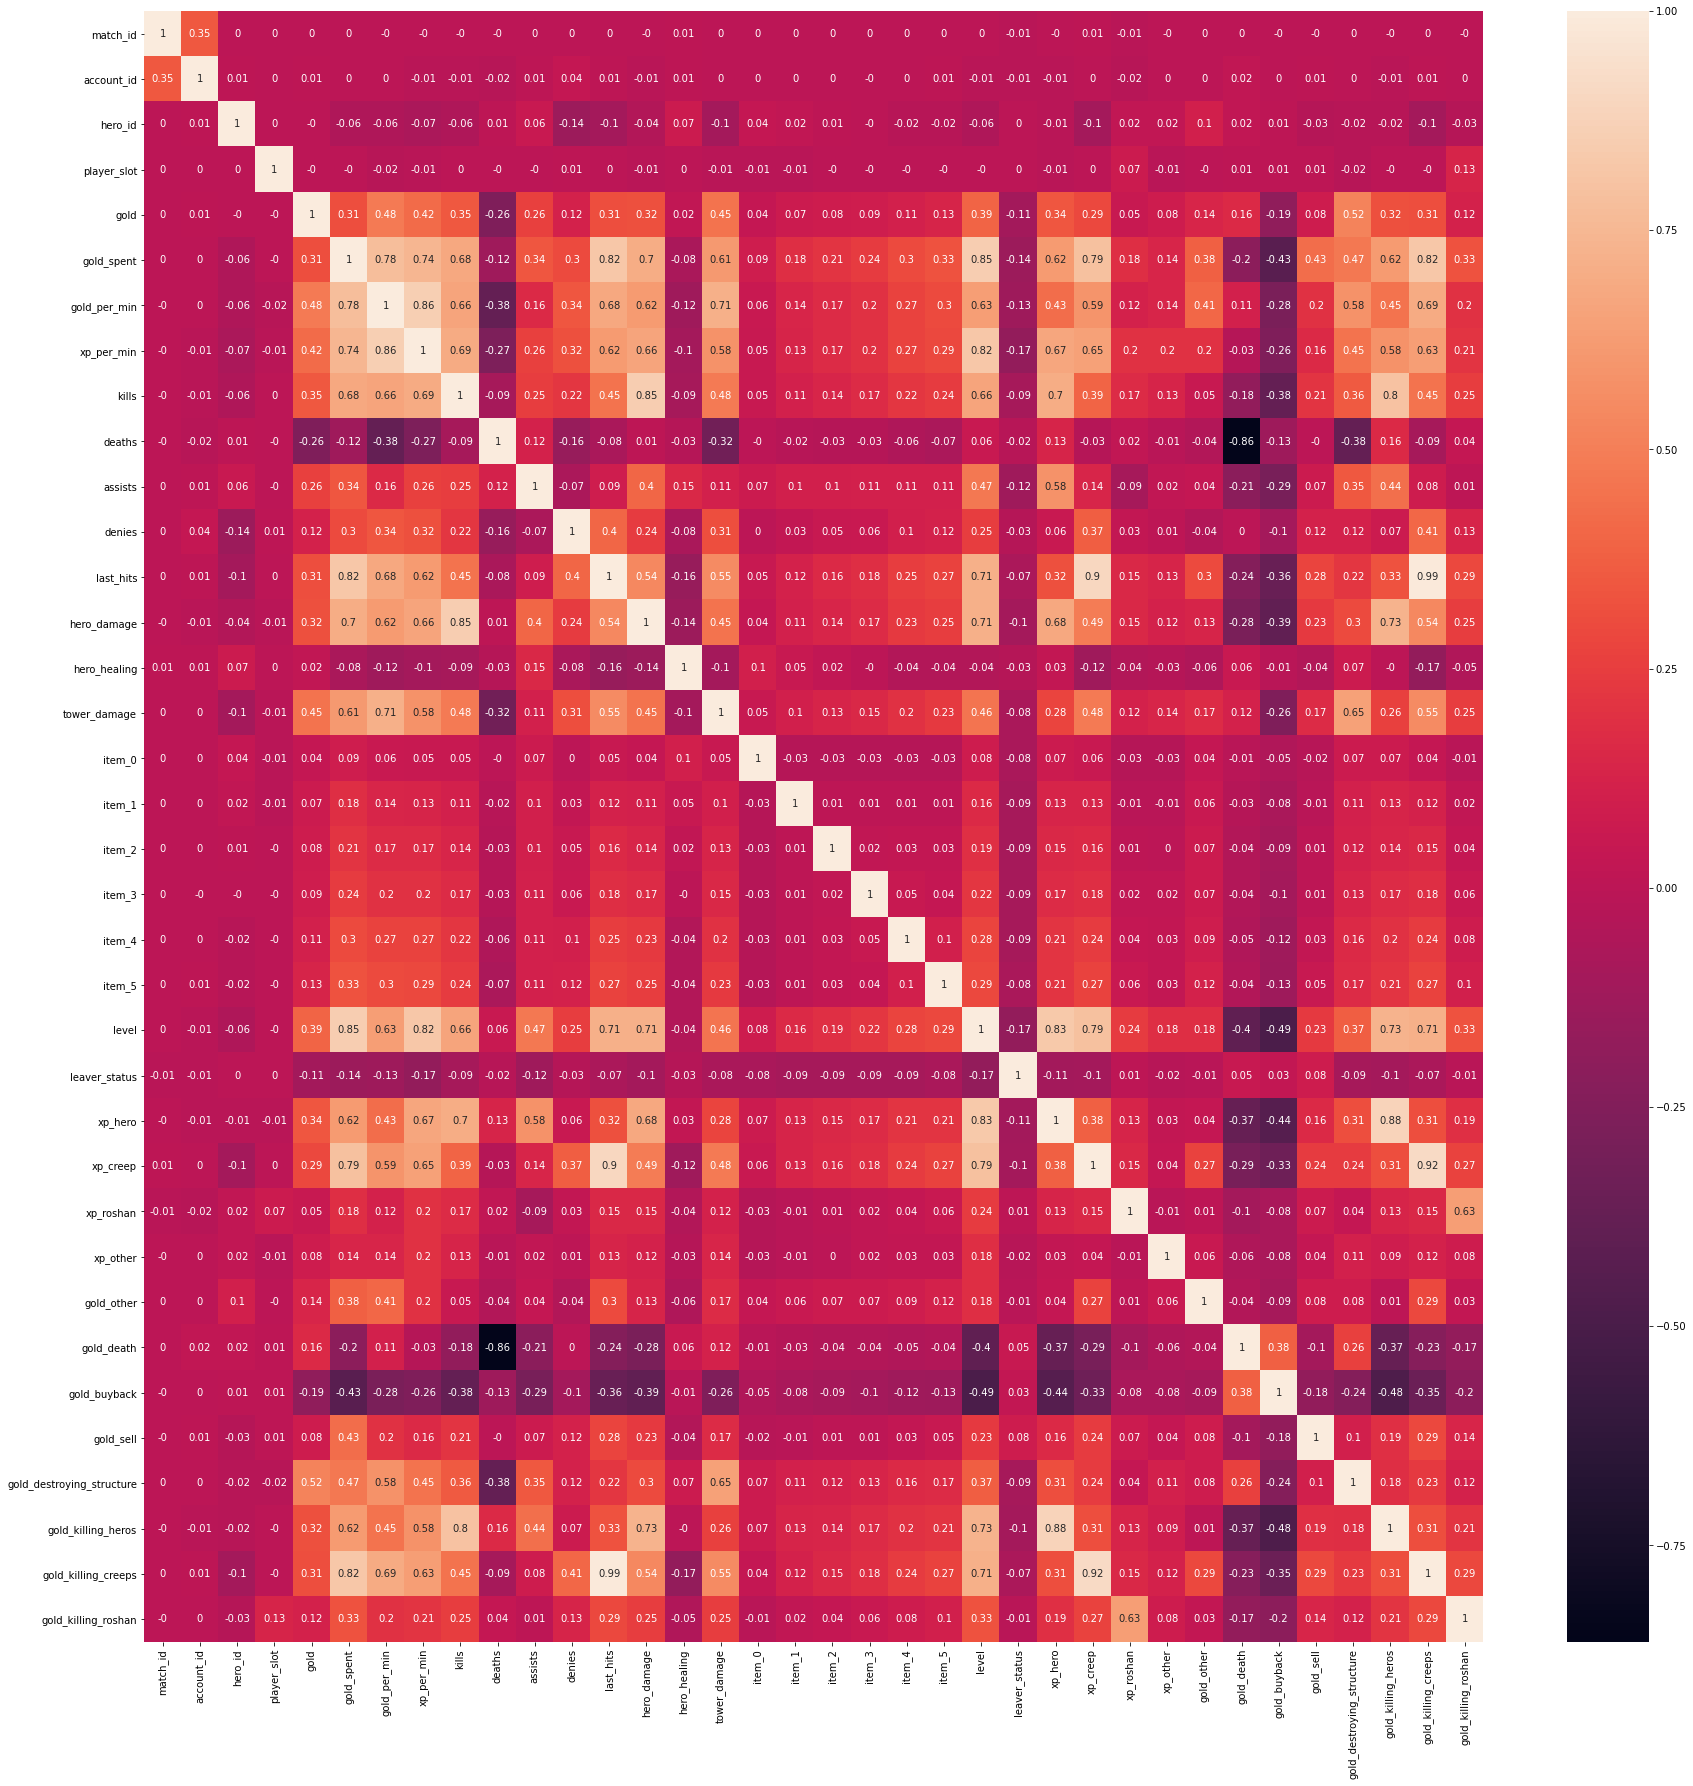

In [46]:
ig, ax = plt.subplots(figsize=(30,30))   
sns.heatmap(round(match_end.corr(),2), annot=True)

Already we can identify some interesting relationships between variables. We will explore this further in the EDA step of the analysis.

In [66]:
players.to_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\2.Data Wrangling\players.csv', index=False, header=True)

## Broader perspective of the games (+100k previous games)

### a. match_outcomes (historic of matches previously played, no match id info we can use, but good for player skill calculation)

In [47]:
#We check the structure of the dataset
match_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828588 entries, 0 to 1828587
Data columns (total 10 columns):
 #   Column          Dtype
---  ------          -----
 0   match_id        int64
 1   account_id_0    int64
 2   account_id_1    int64
 3   account_id_2    int64
 4   account_id_3    int64
 5   account_id_4    int64
 6   start_time      int64
 7   parser_version  int64
 8   win             int64
 9   rad             int64
dtypes: int64(10)
memory usage: 139.5 MB


In [48]:
#We explore the first rows to get an intuition of the information contained
match_outcomes.head()

,match_id,account_id_0,account_id_1,account_id_2,account_id_3,account_id_4,start_time,parser_version,win,rad
0,1636204962,34549,0,0,-51743434,-120875154,1437014585,12,1,0
1,1636204962,0,61598,138825,0,207232,1437014585,12,0,1
2,1636322679,0,-44943233,-240360907,19599,0,1437019968,12,0,0
3,1636322679,-97530201,0,0,0,-116349387,1437019968,12,1,1
4,1637385965,0,0,0,104738,0,1437052551,12,1,0


In [49]:
#We check that match id has exactly 50000 unique values
#As there are +50000 unique match ids, this tells us that there may be more matches here than in the other dataframes. We may need to filter this based on the other datasets.
match_outcomes['match_id'].nunique()

914294

It seems that match_id is no longer numbered from 0 to 49999 but now has a unique identifier code.

 * account_id0 - it is the player unique id (each match is duplicated). Therefore:
   * on first row, account_id0 shows the id of player 1 in team 1, and
   * on second row, account_id0 shows the id of player 1 in team 2. 
 * win - this boolean is 1 for winning team and 0 for losing team
 * rad - this value is 0 for radiant and 1 for dire (confirm)
 
The first issue we encounter is that match_id is not numbered 0 to 49999 but with a unique identifier. We will check more dataframes and see how to approach this.

In [50]:
#calculate % of missing values per column
missing_match_outcomes = pd.concat([match_outcomes.isnull().sum(), 100 * match_outcomes.isnull().mean()], axis=1)
missing_match_outcomes.columns=["count", "%"]
missing_match_outcomes.sort_values(by="%", ascending = False)

,count,%
match_id,0,0.0
account_id_0,0,0.0
account_id_1,0,0.0
account_id_2,0,0.0
account_id_3,0,0.0
account_id_4,0,0.0
start_time,0,0.0
parser_version,0,0.0
win,0,0.0
rad,0,0.0


### b. player_ratings (only for player skill calculation)

In [51]:
#We check the structure of the dataset
#Trueskills are stored as float, while the rest of values as integrers, which make sense as the are counts.
#account_id is stored as an integer
player_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834226 entries, 0 to 834225
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   account_id       834226 non-null  int64  
 1   total_wins       834226 non-null  int64  
 2   total_matches    834226 non-null  int64  
 3   trueskill_mu     834226 non-null  float64
 4   trueskill_sigma  834226 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 31.8 MB


In [52]:
player_ratings.head()

,account_id,total_wins,total_matches,trueskill_mu,trueskill_sigma
0,236579,14,24,27.868035,5.212361
1,-343,1,1,26.544163,8.065475
2,-1217,1,1,26.521103,8.114989
3,-1227,1,1,27.248025,8.092217
4,-1284,0,1,22.931016,8.092224


player_ratings details the following variables in relation with player ratings:

* account_id - this is the account id of the player
* total_wins - this is the nº of winned matches for the player
* total_matches - this is the nº of matches for the player
* trueskill_mu - pending to review
* trueskill_sigma - pending to review

In [53]:
#First we want to check how many players have been identified, there is only one account id with zero value
player_ratings[player_ratings.account_id == 0]

,account_id,total_wins,total_matches,trueskill_mu,trueskill_sigma
834225,0,1608398,3315071,25.0,8.333333


<AxesSubplot:xlabel='how_gamer', ylabel='ratio_winlose'>

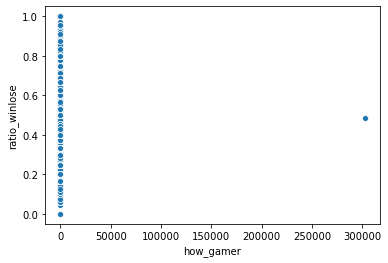

In [54]:
#the ratio of won matches vs. played matches
player_ratings['ratio_winlose'] = player_ratings.total_wins/player_ratings.total_matches
#the ratio of matches played vs. avg matches played in the dataset
player_ratings['how_gamer'] = player_ratings.total_matches / player_ratings.total_matches.mean()
#scatter plot of ratio winlose and how gamer.
sns.scatterplot(data=player_ratings, x='how_gamer', y = 'ratio_winlose')

In [55]:
#there is one outlier that we are going to delete
player_ratings.how_gamer.max()

302475.83600526745

In [56]:
player_ratings.drop(player_ratings[player_ratings.how_gamer > 10000].index, inplace=True)

<AxesSubplot:xlabel='ratio_winlose', ylabel='how_gamer'>

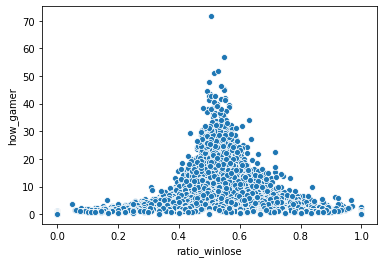

In [57]:
sns.scatterplot(data=player_ratings, x= 'ratio_winlose', y='how_gamer')

Intuitively, it seems that as players play more, they tend to center to a 50% win lose ratio.

<AxesSubplot:xlabel='ratio_winlose', ylabel='trueskill_mu'>

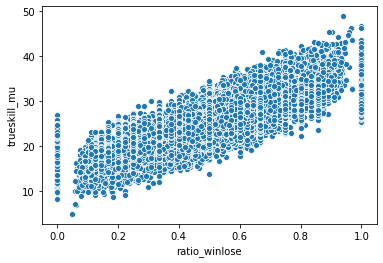

In [58]:
sns.scatterplot(data=player_ratings, x= 'ratio_winlose', y='trueskill_mu')

It seems to be a strong positive correlation between trueskill_mu and the percentage of matches won. The best the win lose ratio of matches the higher the trueskill_mu score.

<AxesSubplot:xlabel='ratio_winlose', ylabel='trueskill_sigma'>

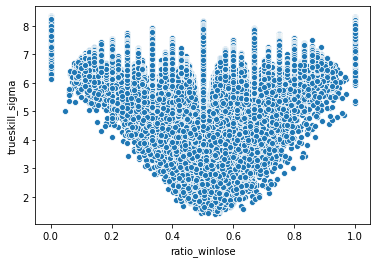

In [59]:
sns.scatterplot(data=player_ratings, x= 'ratio_winlose', y='trueskill_sigma')

It's hard to interpret the ratio of win lose vs the trueskill_sigma score.

<AxesSubplot:xlabel='trueskill_sigma', ylabel='how_gamer'>

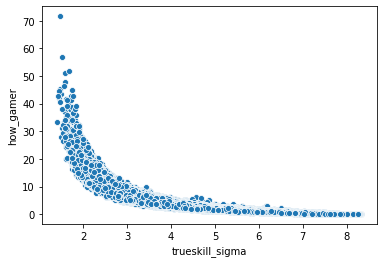

In [60]:
sns.scatterplot(data=player_ratings, x= 'trueskill_sigma', y='how_gamer')

In any case, it seems that the more players play the game, the lower their trueskill_sigma score is. It may be an indication that the lower the sigma score, the more skilled the player should be.

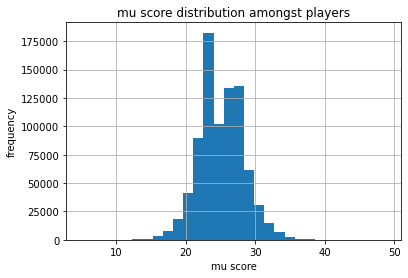

In [61]:
#We plot the trueskill_mu, it's hard to interpret this.
#As Dota 2 is a mature game, we would expect the skill distribution to proxy a Normal Distribution.
player_ratings['trueskill_mu'].hist(bins=30)
plt.xlabel('mu score')
plt.ylabel('frequency')
plt.title('mu score distribution amongst players')
plt.show()

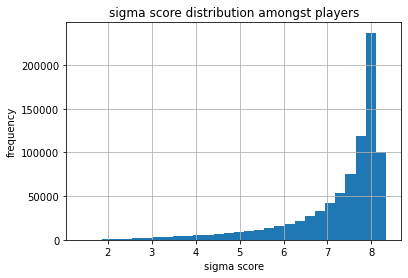

In [62]:
#trueskill_sigma seems to have a left skewed distribution.
#As first interpretation, it could be that the lower the value the higher the skill of player.
player_ratings['trueskill_sigma'].hist(bins=30)
plt.xlabel('sigma score')
plt.ylabel('frequency')
plt.title('sigma score distribution amongst players')
plt.show()

<AxesSubplot:>

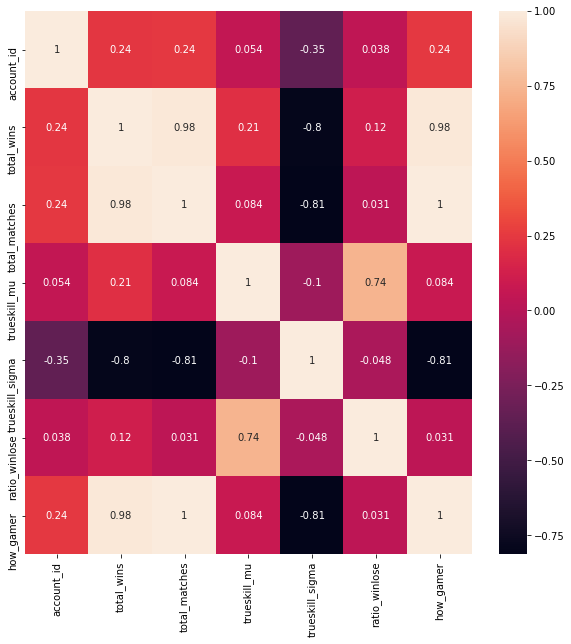

In [63]:
ig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(round(player_ratings.corr(),4), annot=True)